# Stock Forecast - EXL 

The goal of this excercise is to create a base to forecast stock price of a company which can then be expanded/improved afterwards. I suggest improvements to the methodology throughout the script and it is designed in a way to plug in those improvements without making any major changes to the base script itself.

We follow these steps in this exercise:

    1.) Data extraction and Exploration
    2.) Comparison against Competitors
    3.) Risk vs Return
    4.) Forecasting
    5.) Model Performance


# 1. Stock Baseline Analysis

First we compare EXL stock performance against its competitors and a blue-chip stock to provide context

In [5]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['EXLS', 'AAPL', 'G', 'WNS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [EXLS, AAPL, G, WNS]
company_name = ['EXL', 'APPLE', 'GENPACT', 'WNS']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-01-05,61.770000,62.299999,60.160000,61.509998,61.509998,83500,WNS
2024-01-08,62.689999,63.799999,61.119999,63.250000,63.250000,319900,WNS
2024-01-09,62.750000,63.529999,62.119999,63.310001,63.310001,113600,WNS
2024-01-10,63.320000,63.889999,62.970001,63.279999,63.279999,138400,WNS
2024-01-11,63.360001,65.510002,62.520000,64.769997,64.769997,249900,WNS
2024-01-12,65.349998,66.279999,65.110001,65.970001,65.970001,118600,WNS
2024-01-16,65.500000,66.699997,65.430000,65.900002,65.900002,368700,WNS
2024-01-17,65.599998,65.779999,64.550003,64.949997,64.949997,271400,WNS
2024-01-18,70.000000,70.000000,62.090000,62.939999,62.939999,400700,WNS


## Statistics about the Data

In [7]:
# Summary Stats
EXLS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,30.407448,30.745272,30.035080,30.377048,30.377048,1.106290e+06
std,2.285528,2.315628,2.246042,2.301059,2.301059,5.890495e+05
min,25.620001,25.760000,25.170000,25.230000,25.230000,2.609000e+05
25%,28.702500,29.137499,28.292500,28.815000,28.815000,7.587000e+05
50%,30.301001,30.683000,29.962000,30.337999,30.337999,9.077000e+05
75%,31.914500,32.416501,31.654000,32.000000,32.000000,1.315750e+06
max,35.622002,35.944000,35.051998,35.675999,35.675999,4.082700e+06


In [6]:
# General info
EXLS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-23 to 2024-01-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


## Closing Price Comparison

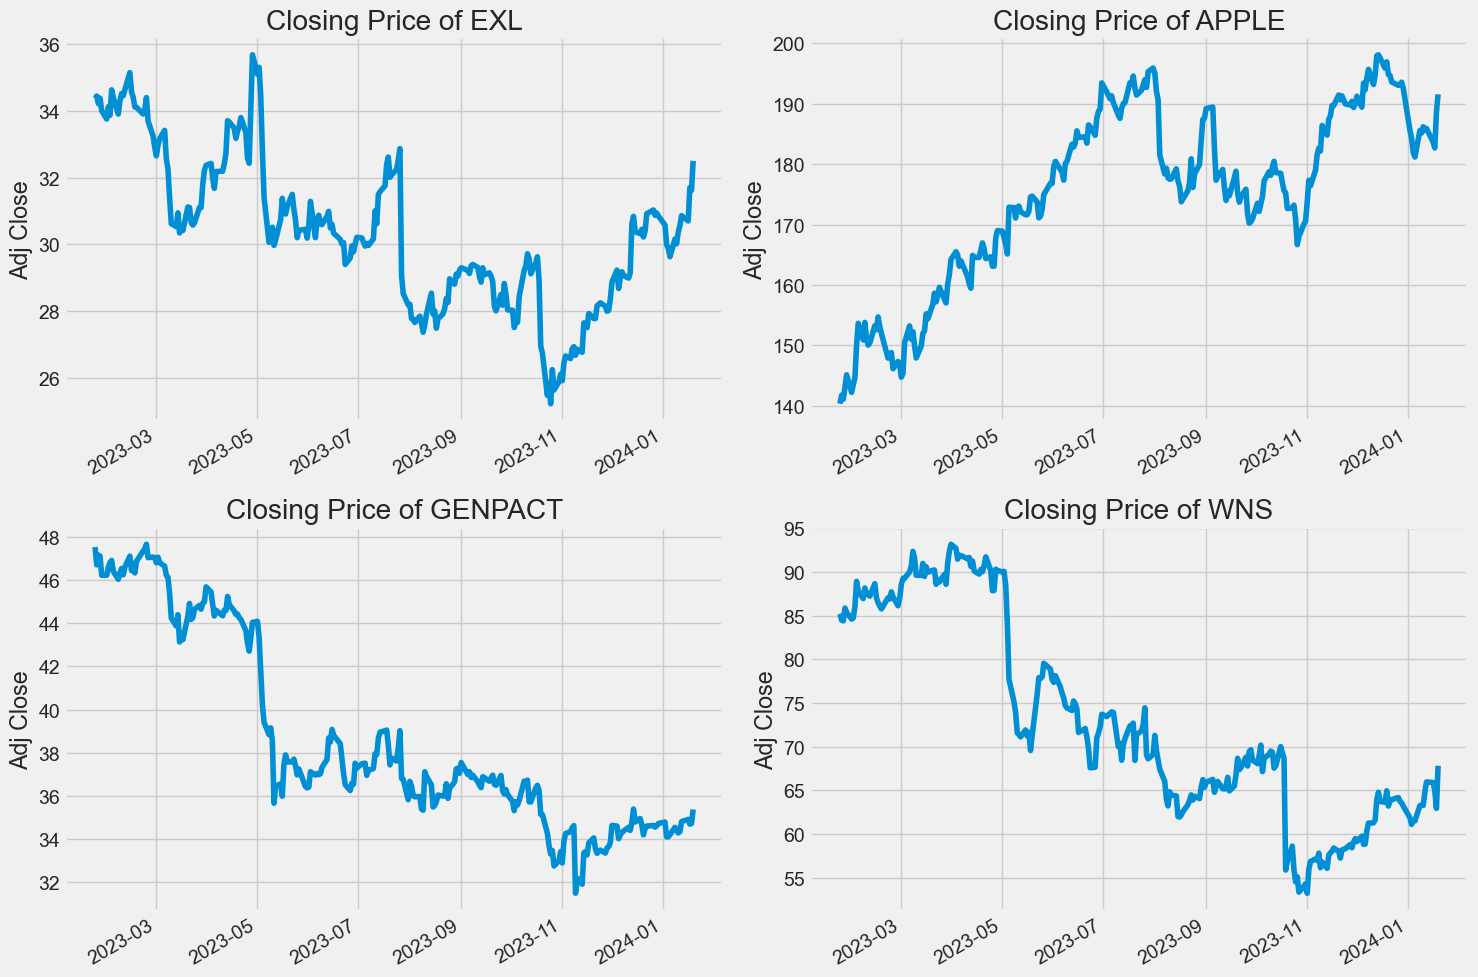

In [12]:
# Historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

## Volume of Sales

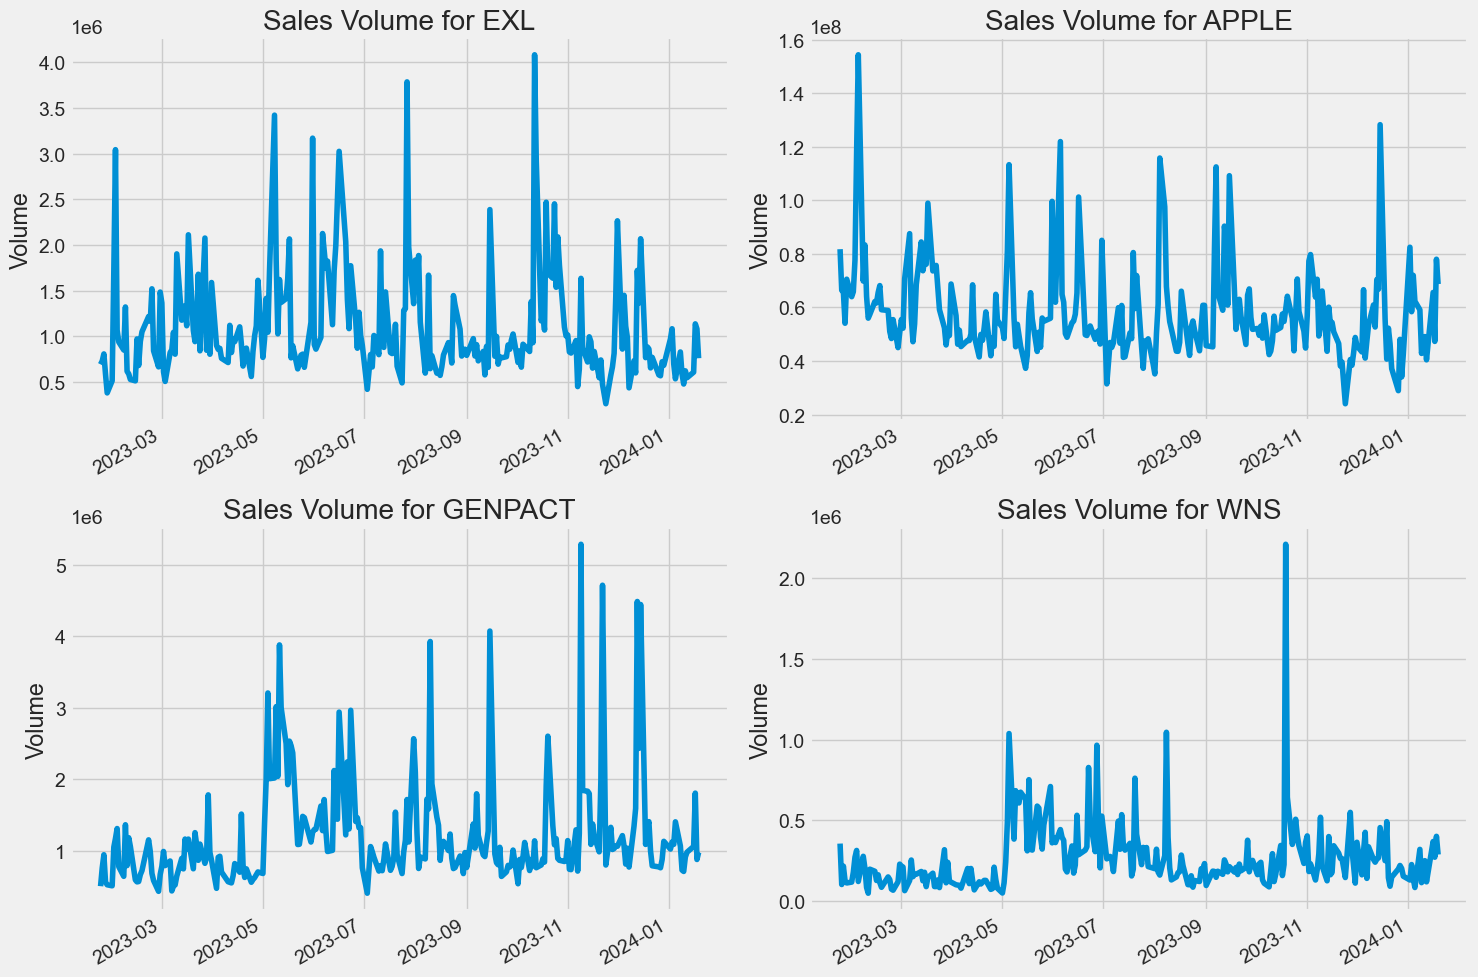

In [13]:
# Total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

# 2. Daily return of the stock on average

Now we analyze the risk of the stock by calculating its daily changes.

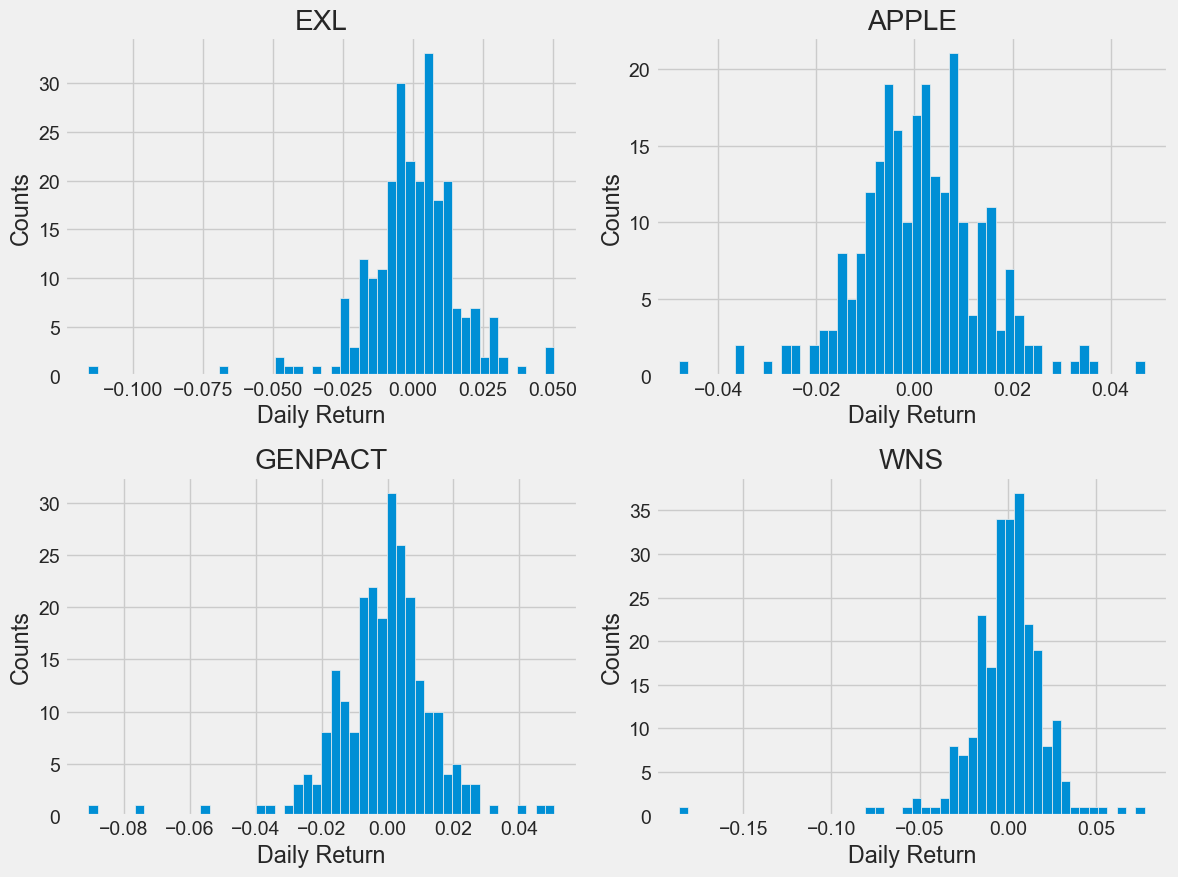

In [14]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Correlation between stocks

Next we do compare returns statistically by calculating correlation

In [60]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,EXLS,G,WNS
Date,,,,
2023-01-23,NaN,NaN,NaN,NaN
2023-01-24,0.010063,0.001978,-0.017416,-0.008567
2023-01-25,-0.004701,-0.006620,0.009707,-0.000947
2023-01-26,0.014803,0.004793,-0.001045,0.017417
2023-01-27,0.013684,-0.010937,-0.018828,-0.005590


Text(0.5, 1.0, 'Correlation of stock closing price')

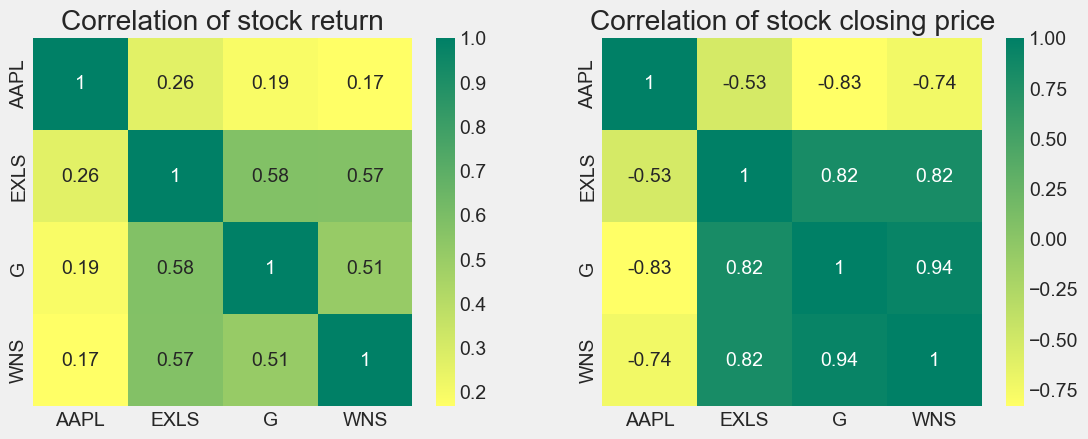

In [61]:
#Building a heatmap
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer_r')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer_r')
plt.title('Correlation of stock closing price')

## Risk vs Return

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

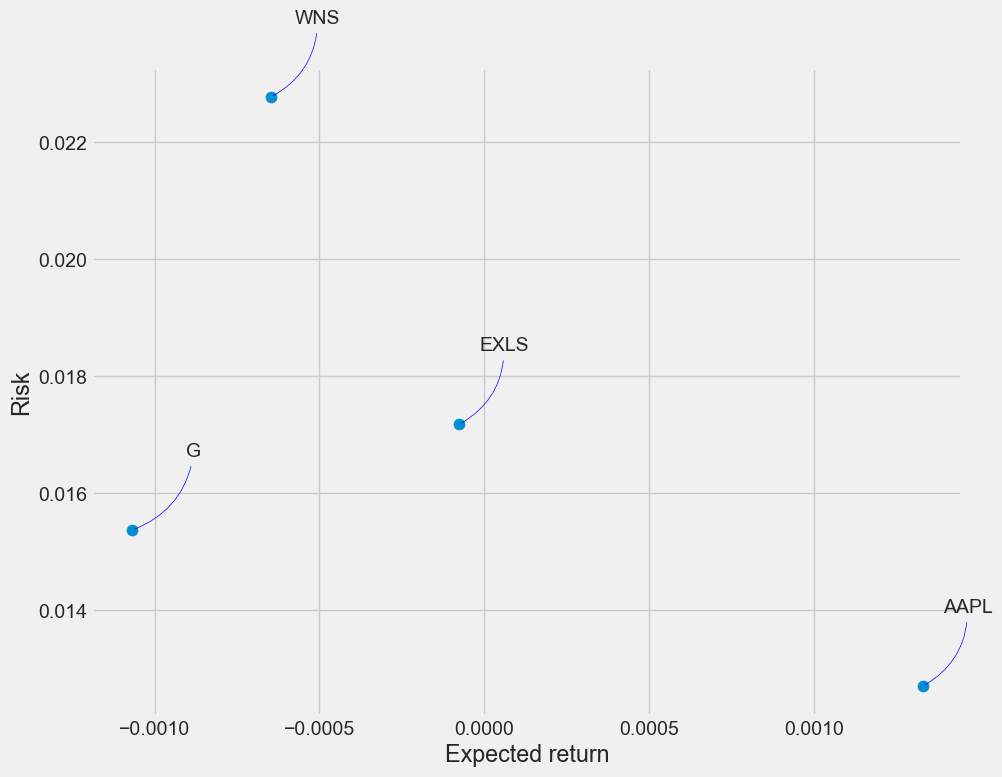

In [734]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 3. Predicting the closing price stock price of EXL:

In [702]:
# Get the stock quote
df = pdr.get_data_yahoo('EXLS', start='2012-01-01', end=datetime.now())
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,4.548000,4.596000,4.472000,4.498000,4.498000,634000
2012-01-04,4.468000,4.544000,4.428000,4.440000,4.440000,692500
2012-01-05,4.422000,4.562000,4.380000,4.438000,4.438000,551000
2012-01-06,4.440000,4.446000,4.294000,4.356000,4.356000,452500
2012-01-09,4.360000,4.440000,4.326000,4.400000,4.400000,966500
...,...,...,...,...,...,...
2024-01-12,30.770000,31.190001,30.730000,30.860001,30.860001,545400
2024-01-16,30.650000,31.010000,30.530001,30.700001,30.700001,606400
2024-01-17,31.260000,31.770000,30.780001,31.700001,31.700001,1135700


### <span style="color:red">IMPROVEMENT 
    1. Add more predictors (Eg. Sentiment, Financial Health, Sector Indices)

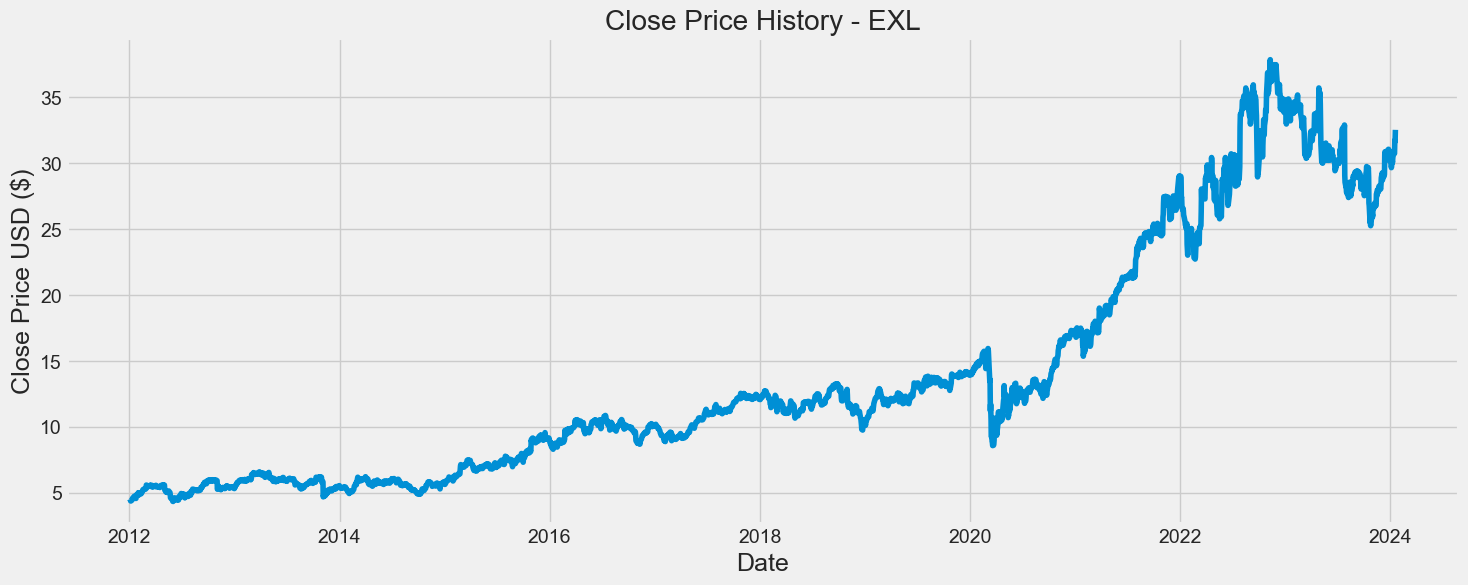

In [62]:
#History of EXL Stock
plt.figure(figsize=(16,6))
plt.title('Close Price History - EXL')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## Training/Test Data

In [508]:
# Create a new dataframe
data = df.filter(['Close', 'Volume'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2880

In [509]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00525405, 0.0142078 ],
       [0.0035226 , 0.01576427],
       [0.0034629 , 0.01199947],
       ...,
       [0.81730256, 0.02755621],
       [0.81491436, 0.02608753],
       [0.84118456, 0.01754157]])

In [658]:
# Defining forecast duration and historical window used
forecast_duration = 30
obs_window = 60

# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(obs_window, len(train_data) - forecast_duration):
    x_train.append(train_data[i-obs_window:i])  # Include both 'Close' and 'Volume'
    y_train.append(train_data[i:i+forecast_duration, 0])  # Predicting next 7 days' 'Close' prices

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
# The new shape of x_train will be [number of samples, Observation window, number of features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], train_data.shape[1]))


## LSTM Architecture

![LSTM Architecture](../__Work/LSTM.png)

## Model Building

### <span style="color:red">IMPROVEMENT 
    1. Experiment with observation window, model architechture and hyperparameters
    2. Make individual models for 7 and 30 forecasts
    3. Create a baseline
    4. Switch to GPU in Pytorch for better performance 
    5. Set seeds when building the LSTM

In [659]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 2)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(30))
model.add(Dropout(0.2))
model.add(Dense(forecast_duration))  # Predicting 7 days

# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=15, shuffle=True)


Epoch 1/15
88/88 [==============================] - 5s 27ms/step - loss: 0.0867
Epoch 2/15
88/88 [==============================] - 2s 27ms/step - loss: 0.0469
Epoch 3/15
88/88 [==============================] - 2s 28ms/step - loss: 0.0398
Epoch 4/15
88/88 [==============================] - 2s 27ms/step - loss: 0.0355
Epoch 5/15
88/88 [==============================] - 2s 28ms/step - loss: 0.0331
Epoch 6/15
88/88 [==============================] - 3s 29ms/step - loss: 0.0322
Epoch 7/15
88/88 [==============================] - 3s 28ms/step - loss: 0.0304
Epoch 8/15
88/88 [==============================] - 3s 28ms/step - loss: 0.0292
Epoch 9/15
88/88 [==============================] - 3s 29ms/step - loss: 0.0292
Epoch 10/15
88/88 [==============================] - 2s 28ms/step - loss: 0.0300
Epoch 11/15
88/88 [==============================] - 3s 29ms/step - loss: 0.0285
Epoch 12/15
88/88 [==============================] - 2s 28ms/step - loss: 0.0273
Epoch 13/15
88/88 [==================

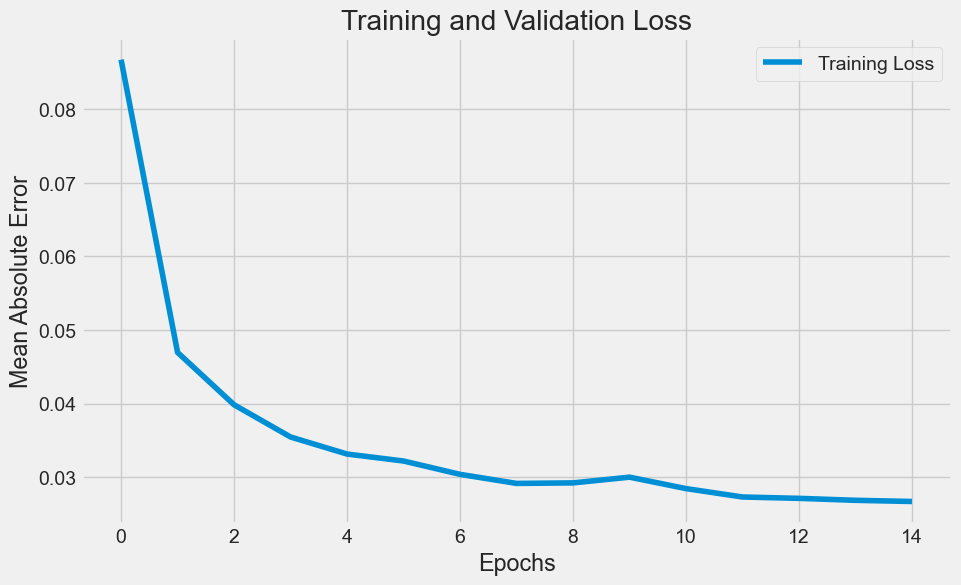

In [660]:
# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [661]:
# Create the testing data set
test_data = scaled_data[training_data_len - obs_window: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = []
# Adjust the range to leave a buffer of forecast period for the y_test data
for i in range(obs_window, len(test_data) - forecast_duration):
    x_test.append(test_data[i-obs_window:i])  # Include both 'Close' and 'Volume'
    y_test.append(test_data[i:i+forecast_duration, 0])  # Next 7 days' 'Close' prices
    
# Convert the x_test and y_test to numpy arrays 
x_test, y_test = np.array(x_test), np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 2 ))

# Get the models predicted price values 
predictions = model.predict(x_test)

# Reshape data to pass through inverse scaler and fill with zeroes where needed
dummy_array = np.zeros((predictions.shape[0],predictions.shape[1], 2))
dummy_array[:,:,0] = predictions[:,:]
scaled_pred = scaler.inverse_transform(dummy_array.reshape(-1, 2))
scaled_pred_shaped = scaled_pred.reshape(dummy_array.shape)

predictions = scaled_pred_shaped[:, :, 0]

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 15ms/step


28.923290899409068

# 4. Performance Evaluation

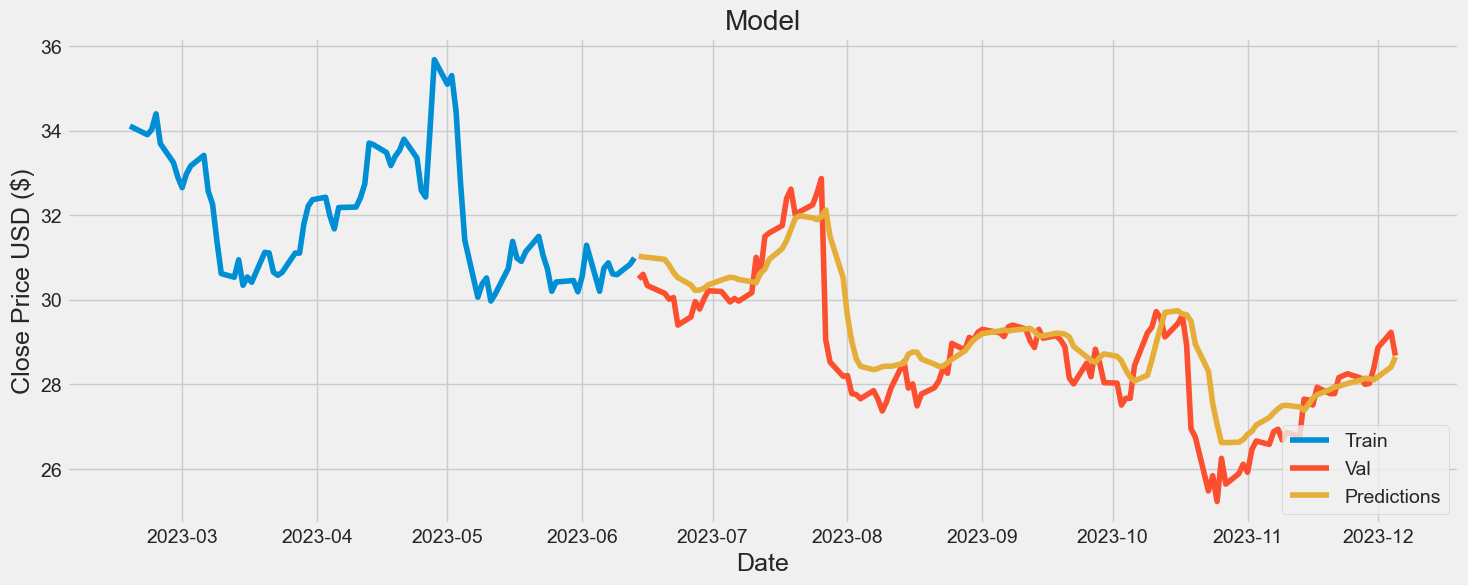

In [674]:
# One day Forecast
train = data[:training_data_len]
valid = data[training_data_len:-forecast_duration].copy()
valid['Predictions'] = predictions[:,0]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][2800:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [676]:
# Assuming 'data' is your DataFrame
valid['Close_diff'] = valid['Close'].diff()
valid['Predictions_diff'] = valid['Predictions'].diff()

# Function to categorize trend
def categorize_trend(x):
    if x > 0:
        return 'increase'
    elif x < 0:
        return 'decrease'
    else:
        return 'same'

# Apply categorization
valid['Close_trend'] = valid['Close_diff'].apply(categorize_trend)
valid['Predictions_trend'] = valid['Predictions_diff'].apply(categorize_trend)

# Calculate matching trends
matched_trends = sum(valid['Close_trend'] == valid['Predictions_trend'])
total_trends = len(valid) - 1  # First row is NaN due to diff()

# Calculate matching percentage
matching_percentage = (matched_trends / total_trends) * 100

print(f"Percentage of times the trend matched: {matching_percentage:.2f}%")


Percentage of times the trend matched: 52.50%


### <span style="color:red">IMPROVEMENT
    1. Create a weighted comparison and add commercial benefits.  
    2. Extend evaluation to 7 day and 30 day forecasts 

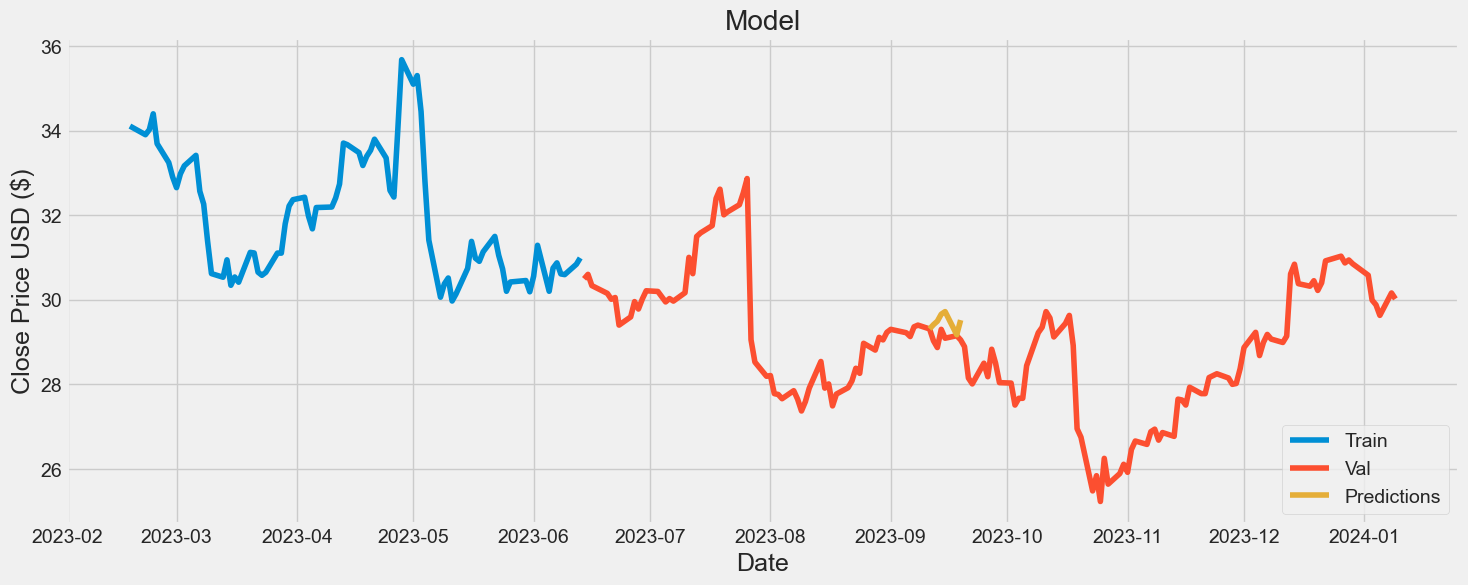

In [689]:
# 7 Day forecast

prediction_start_index = 60

train = data[:training_data_len]
valid = data[training_data_len:-7].copy()
valid['Predictions'] = np.nan

valid.iloc[prediction_start_index:prediction_start_index + 7, valid.columns.get_loc('Predictions')] = predictions[prediction_start_index, 0:7]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][2800:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

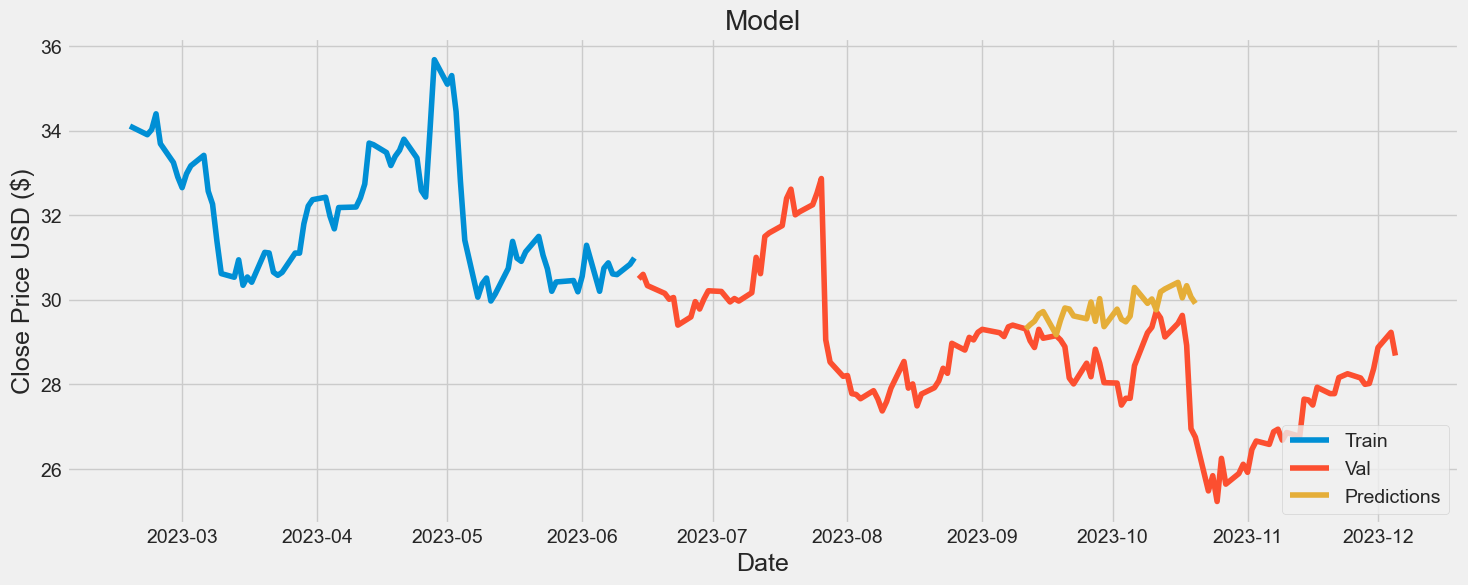

In [671]:
# 30 Day forecast

train = data[:training_data_len]
valid = data[training_data_len:-forecast_duration].copy()
valid['Predictions'] = np.nan

valid.iloc[prediction_start_index:prediction_start_index + forecast_duration, valid.columns.get_loc('Predictions')] = predictions[prediction_start_index, :]

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][2800:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()